In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
%ls

 Том в устройстве E имеет метку Новый том
 Серийный номер тома: C01F-4EE3

 Содержимое папки E:\GeekBrains\Python для Data Science\GeekBrains_AI_Python_for_data_science\CourseProject

14.02.2019  20:30    <DIR>          .
14.02.2019  20:30    <DIR>          ..
13.02.2019  23:43    <DIR>          .ipynb_checkpoints
14.02.2019  20:30         2 448 070 cleanovik.ipynb
13.02.2019  23:39           500 428 test.csv
14.02.2019  20:22         1 366 195 thesis.ipynb
13.02.2019  23:40         1 185 934 train.csv
               4 файлов      5 500 627 байт
               3 папок  152 876 154 880 байт свободно


**Загружаем "сырые" данные**

In [3]:
test_raw = pd.read_csv('test.csv')
train_raw = pd.read_csv('train.csv')

**Оцениваем "сырые" данные**

In [4]:
test_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [5]:
train_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
test_raw.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [7]:
train_raw.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [9]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [10]:
pd.value_counts(test_raw.Ecology_2)

B    4952
A      48
Name: Ecology_2, dtype: int64

In [11]:
pd.value_counts(train_raw.Ecology_2)

B    9903
A      97
Name: Ecology_2, dtype: int64

In [12]:
pd.value_counts(test_raw.Ecology_3)

B    4851
A     149
Name: Ecology_3, dtype: int64

In [13]:
pd.value_counts(train_raw.Ecology_3)

B    9725
A     275
Name: Ecology_3, dtype: int64

In [14]:
pd.value_counts(test_raw.Shops_2)

B    4588
A     412
Name: Shops_2, dtype: int64

In [15]:
pd.value_counts(train_raw.Shops_2)

B    9175
A     825
Name: Shops_2, dtype: int64

Так как **'Ecology_2', 'Ecology_3', 'Shops_2'** являются категориальными признаками, но каждый из них имеет всего два класса, можно заменить их колонками со значениями 0 и 1:

In [16]:
test_raw['Ecology_2'] = (test_raw['Ecology_2'] == "A").astype(int)

In [17]:
test_raw.Ecology_2.dtype

dtype('int32')

In [18]:
pd.value_counts(test_raw.Ecology_2)

0    4952
1      48
Name: Ecology_2, dtype: int64

In [19]:
train_raw['Ecology_2'] = (train_raw['Ecology_2'] == "A").astype(int)

In [20]:
test_raw['Ecology_3'] = (test_raw['Ecology_3'] == "A").astype(int)

In [21]:
train_raw['Ecology_3'] = (train_raw['Ecology_3'] == "A").astype(int)

In [22]:
test_raw['Shops_2'] = (test_raw['Shops_2'] == "A").astype(int)

In [23]:
train_raw['Shops_2'] = (train_raw['Shops_2'] == "A").astype(int)

In [24]:
test_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,0,0,11,2748,1,NaN,0,0,0
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,0,0,6,1437,3,NaN,0,2,0
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,0,0,30,7538,87,4702.0,5,5,0
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,0,0,23,4583,3,NaN,3,3,0
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,0,0,2,629,1,NaN,0,0,1


In [25]:
train_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,0,33,7976,5,NaN,0,11,0,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,0,46,10309,1,240.0,1,16,0,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,0,0,34,7759,0,229.0,1,3,0,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,0,23,5735,3,1084.0,0,5,0,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,0,35,5776,1,2078.0,2,4,0,150226.531644


**Жилая площадь 'LifeSquare' имеет незаполненные значения, значения превышающие имеющуюся площадь 'Square', а так же наоборот, значения сильно меньше чем площадь 'Square'**

Text(0, 0.5, 'LifeSquare')

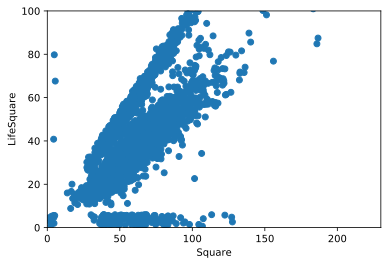

In [26]:
plt.scatter(train_raw['Square'], train_raw['LifeSquare'])
plt.ylim(0, 100)
plt.xlim(0, 230)
plt.xlabel("Square")
plt.ylabel("LifeSquare")

**Для начала мы создадим копию данных, в которых просто зададим медианные значения жилой площади 'LifeSquare' и 'Healthcare_1' всем записям, имеющим незаполненные значения.**

In [27]:
lifesquare_median = train_raw.LifeSquare.median()
lifesquare_median

32.781260192155735

In [28]:
healthcare_1_median = train_raw.Healthcare_1.median()
healthcare_1_median

900.0

In [29]:
train_median = train_raw.copy()
test_median = test_raw.copy()

In [30]:
train_median.LifeSquare = train_median.LifeSquare.fillna(lifesquare_median)
test_median.LifeSquare = test_median.LifeSquare.fillna(lifesquare_median)

In [31]:
train_median.Healthcare_1 = train_median.Healthcare_1.fillna(healthcare_1_median)
test_median.Healthcare_1 = test_median.Healthcare_1.fillna(healthcare_1_median)

In [32]:
train_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int32
Ecology_3        10000 non-null int32
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int32
Price            10000 non-null float64
dtypes: float64(8), int32(3), int64(9)
memory usage: 1.4 MB


In [33]:
test_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int32
Ecology_3        5000 non-null int32
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int32
dtypes: float64(7), int32(3), int64(9)
memory usage: 683.7 KB


**В качестве отправной точки получим результат на "медианных" данных, используя LinearRegression модель.**  
Так же нам понадобится разбить данные с ответами на тренировочные и валидационные.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr_median = LinearRegression()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_median = train_median.drop(columns=['Price', 'Id'])
y_median = train_median.Price

In [38]:
X_train_median, X_valid_median, y_train_median, y_valid_median = train_test_split(X_median, y_median, test_size=0.2, random_state=158)

In [39]:
X_train_median.shape, X_valid_median.shape, y_train_median.shape, y_valid_median.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [40]:
lr_median.fit(X_train_median, y_train_median)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
y_pred_median = lr_median.predict(X_valid_median)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [43]:
mse_median = mean_squared_error(y_valid_median, y_pred_median)
mse_median

4396454410.446781

In [44]:
mae_median = mean_absolute_error(y_valid_median, y_pred_median)
mae_median

45762.7686809867

In [45]:
r2_median = r2_score(y_valid_median, y_pred_median)
r2_median

0.5179225316149991

**Итого, на "медианных" данных:**  
**mse_median**: 4868227129.445428   
**mae_median**: 45523.531388788746   
**r2_median**: 0.44518344059620973

**Наводим порядок в данных в столбцах 'Square' и 'LifeSquare':**

In [46]:
square_fix_data = dict()

**Для 1/2/3/4 комнатных квартир:**

In [47]:
for n_rooms in range(1, 5):
    valid_by_condition = train_raw.loc[train_raw.Rooms==n_rooms].loc[(train_raw.LifeSquare>0.3*train_raw.Square) & (train_raw.LifeSquare <= train_raw.Square)]
    mean_lifesquare = valid_by_condition.LifeSquare.mean()
    mean_square = valid_by_condition.Square.mean()
    std_lifesquare = valid_by_condition.LifeSquare.std()
    std_square = valid_by_condition.Square.std()
    lifesquare_to_square_coef = mean_lifesquare / mean_square
    square_fix_data[n_rooms] = {"mean_lifesquare": mean_lifesquare, 
                                "mean_square": mean_square, 
                                "std_lifesquare": std_lifesquare, 
                                "std_square": std_square, 
                                "lifesquare_to_square_coef": lifesquare_to_square_coef}
    def check_sq_and_ls(x):
        def check_valid(x, std, mean):
            return (mean - x < 1.7*std) if x < mean else (x - mean < 6 * std)
        valid_square = check_valid(x.Square, std_square, mean_square)
        valid_lifesquare = check_valid(x.LifeSquare, std_lifesquare, mean_lifesquare)
        if not valid_square and not valid_lifesquare:
            x.Square = mean_square
            x.LifeSquare = mean_lifesquare
        elif not valid_square:
            x.Square = x.LifeSquare / lifesquare_to_square_coef
        elif not valid_lifesquare:
            x.LifeSquare = x.Square * lifesquare_to_square_coef
        return x
    train_raw.loc[train_raw.Rooms==n_rooms] = train_raw.loc[train_raw.Rooms==n_rooms].apply(check_sq_and_ls, axis=1)

**Для остальных квартир:**

In [48]:
train_rooms_keys = list(train_raw.Rooms.unique().astype(int))
train_rooms_keys

[2, 3, 1, 4, 10, 0, 5, 19, 6]

In [49]:
for n_rooms in [i for i in train_rooms_keys if i not in list(square_fix_data.keys())]:
    mean_lifesquare = square_fix_data[4]["mean_lifesquare"]
    mean_square = square_fix_data[4]["mean_square"]
    std_lifesquare = square_fix_data[4]["std_lifesquare"]
    std_square = square_fix_data[4]["std_square"]
    lifesquare_to_square_coef = square_fix_data[4]["lifesquare_to_square_coef"]
    def check_sq_and_ls(x):
        def check_valid(x, std, mean):
            return (mean - x < 1.7*std) if x < mean else (x - mean < 6 * std)
        valid_square = check_valid(x.Square, std_square, mean_square)
        valid_lifesquare = check_valid(x.LifeSquare, std_lifesquare, mean_lifesquare)
        if not valid_square and not valid_lifesquare:
            x.Square = mean_square
            x.LifeSquare = mean_lifesquare
        elif not valid_square:
            x.Square = x.LifeSquare / lifesquare_to_square_coef
        elif not valid_lifesquare:
            x.LifeSquare = x.Square * lifesquare_to_square_coef
        return x
    train_raw.loc[train_raw.Rooms==n_rooms] = train_raw.loc[train_raw.Rooms==n_rooms].apply(check_sq_and_ls, axis=1)

In [50]:
train_raw.loc[((train_raw.Rooms >3) | (train_raw.Rooms < 1)) & (train_raw.Square > 150)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917.0,27.0,0.0,212.932361,142.651454,0.0,2.0,3.0,2008.0,0.211401,0.0,0.0,9.0,1892.0,0.0,NaN,0.0,1.0,0.0,302211.260887
2656,14556.0,183.0,4.0,151.150660,98.187482,23.0,6.0,7.0,1912.0,0.037316,0.0,0.0,32.0,6748.0,93.0,562.0,4.0,10.0,0.0,284884.959104
4487,13434.0,13.0,5.0,183.382273,100.985505,15.0,2.0,6.0,1997.0,0.090799,0.0,0.0,74.0,19083.0,2.0,NaN,5.0,15.0,0.0,622888.825328
5087,15947.0,129.0,4.0,185.906396,84.830074,31.0,5.0,3.0,2015.0,0.020741,0.0,0.0,24.0,5613.0,5.0,1340.0,2.0,5.0,0.0,340273.238253
6201,10678.0,17.0,4.0,170.016872,113.900742,0.0,12.0,0.0,1977.0,0.093443,0.0,0.0,23.0,4635.0,5.0,3300.0,2.0,4.0,0.0,531049.721966
6451,3914.0,24.0,4.0,155.930023,76.831293,15.0,6.0,22.0,2012.0,0.111627,0.0,0.0,50.0,12238.0,8.0,1970.0,2.0,3.0,0.0,559886.965348
7201,3233.0,129.0,4.0,186.692602,87.487080,32.0,3.0,3.0,2011.0,0.020741,0.0,0.0,24.0,5613.0,5.0,1340.0,2.0,5.0,0.0,423443.464367
8511,4249.0,23.0,5.0,198.930182,123.139863,10.0,1.0,2.0,2011.0,0.014073,0.0,0.0,2.0,475.0,0.0,NaN,0.0,0.0,0.0,345665.209100
9910,16568.0,27.0,4.0,200.334539,134.211696,25.0,1.0,2.0,2013.0,0.041116,0.0,0.0,53.0,14892.0,4.0,NaN,1.0,4.0,0.0,528560.506016


In [51]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null float64
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null float64
Ecology_3        10000 non-null float64
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null float64
Price            10000 non-null float64
dtypes: float64(20)
memory usage: 1.5 MB


In [52]:
train_raw.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.080982,37.059730,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.082500,214138.857399
std,4859.01902,43.587592,0.839512,18.461816,15.608226,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,14.609163,8.822988,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.752869,24.551156,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.621648,33.746356,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.930206,45.325559,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.462171
max,16798.00000,209.000000,19.000000,212.932361,142.651454,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


Text(0, 0.5, 'LifeSquare')

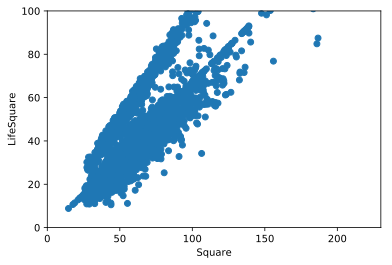

In [53]:
plt.scatter(train_raw['Square'], train_raw['LifeSquare'])
plt.ylim(0, 100)
plt.xlim(0, 230)
plt.xlabel("Square")
plt.ylabel("LifeSquare")

In [54]:
train_raw.loc[train_raw.LifeSquare < 10].head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7767,6927.0,21.0,1.0,14.609163,8.822988,0.0,2.0,5.0,1965.0,0.194489,0.0,0.0,47.0,8004.0,3.0,125.0,3.0,5.0,0.0,79913.267856


In [55]:
square_fix_data[2]["std_lifesquare"]

15.374413907007245

In [56]:
square_fix_data[2]["mean_lifesquare"]

35.15354195704523

In [57]:
for key in square_fix_data:
    print(key)
    for kkey in square_fix_data[key]:
        print(str(kkey)+":", square_fix_data[key][kkey])
    print(square_fix_data[key]["mean_square"] - 1.7 * square_fix_data[key]["std_square"], square_fix_data[key]["mean_square"] + 6 * square_fix_data[key]["std_square"])
    print(square_fix_data[key]["mean_lifesquare"] - 1.7 * square_fix_data[key]["std_lifesquare"], square_fix_data[key]["mean_lifesquare"] + 6 * square_fix_data[key]["std_lifesquare"])
    print()
    

1
mean_lifesquare: 24.13664587206721
mean_square: 39.96561991051002
std_lifesquare: 9.648645069459374
std_square: 8.501783085459186
lifesquare_to_square_coef: 0.6039352304834346
25.512588665229405 90.97631842326513
7.733949253986275 82.02851628882345

2
mean_lifesquare: 35.15354195704523
mean_square: 53.95686123276705
std_lifesquare: 15.374413907007245
std_square: 15.02612705820296
lifesquare_to_square_coef: 0.6515119885383012
28.412445233822016 144.1136235819848
9.017038315132911 127.40002539908869

3
mean_lifesquare: 49.63519763018256
mean_square: 74.30901760130716
std_lifesquare: 12.511082202258324
std_square: 13.735904315947657
lifesquare_to_square_coef: 0.6679565849799289
50.957980264196145 156.7244434969931
28.366357886343412 124.70169084373251

4
mean_lifesquare: 64.2759538657945
mean_square: 95.94315557446389
std_lifesquare: 13.252397399888464
std_square: 22.358095759215907
lifesquare_to_square_coef: 0.6699378760364862
57.934392783796845 230.09173012975936
41.74687828598412 143

**TST**

In [123]:
healthcare_1_median = train_raw.Healthcare_1.median()
healthcare_1_median

900.0

In [124]:
train_raw.Healthcare_1 = train_raw.Healthcare_1.fillna(healthcare_1_median)

In [125]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null float64
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null float64
Ecology_3        10000 non-null float64
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null float64
Price            10000 non-null float64
dtypes: float64(20)
memory usage: 1.5 MB


In [126]:
train_raw.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.080982,37.059730,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,0.082500,214138.857399
std,4859.01902,43.587592,0.839512,18.461816,15.608226,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,14.609163,8.822988,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.752869,24.551156,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,0.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.621648,33.746356,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.930206,45.325559,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,0.000000,249135.462171
max,16798.00000,209.000000,19.000000,212.932361,142.651454,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [127]:
X_ = train_raw.drop(columns=['Price', 'Id'])
y_ = train_raw.Price

In [128]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.2, random_state=158)

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
tst_scaler = StandardScaler()

In [131]:
X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
9757,30.0,1.0,44.876475,27.102484,1.0,16.0,25.0,2017.0,0.000078,0.0,0.0,22.0,6398.0,141.0,1046.0,3.0,23.0,0.0
3935,6.0,1.0,41.939733,25.328882,1.0,12.0,17.0,2019.0,0.243205,0.0,0.0,5.0,1564.0,0.0,540.0,0.0,0.0,0.0
8979,22.0,1.0,87.485627,52.835652,0.0,16.0,0.0,1977.0,0.118537,0.0,0.0,30.0,6207.0,1.0,1183.0,1.0,0.0,0.0
8157,9.0,3.0,66.698816,40.541032,8.0,4.0,12.0,1988.0,0.136244,0.0,0.0,11.0,2370.0,0.0,900.0,0.0,1.0,0.0
6415,9.0,3.0,83.341323,47.499552,8.0,8.0,14.0,1998.0,0.161532,0.0,0.0,25.0,5648.0,1.0,30.0,2.0,4.0,0.0


In [132]:
X_train_scaled = tst_scaler.fit_transform(X_train)

In [133]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,-0.466448,-1.048912,-0.602589,-0.632334,-0.168868,1.419403,1.850100,-0.011039,-1.000642,-0.096625,-0.171278,-0.147877,0.266220,5.564067,0.017579,1.142135,3.914859,-0.295884
1,-1.017154,-1.048912,-0.761010,-0.745924,-0.168868,0.658991,0.658361,-0.011030,1.037252,-0.096625,-0.171278,-1.117983,-0.941727,-0.338425,-0.651455,-0.882030,-0.881580,-0.295884
2,-0.650017,-1.048912,1.695949,1.015744,-0.200278,1.419403,-1.874084,-0.011218,-0.007712,-0.096625,-0.171278,0.308644,0.218492,-0.296564,0.198721,-0.207308,-0.881580,-0.295884
3,-0.948316,1.308524,0.574611,0.228336,0.051002,-0.861831,-0.086476,-0.011168,0.140709,-0.096625,-0.171278,-0.775593,-0.740319,-0.338425,-0.175462,-0.882030,-0.673039,-0.295884
4,-0.948316,1.308524,1.472386,0.673994,0.051002,-0.101420,0.211459,-0.011124,0.352668,-0.096625,-0.171278,0.023318,0.078806,-0.296564,-1.325779,0.467414,-0.047417,-0.295884


In [134]:
X_valid_scaled = tst_scaler.transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_train.columns)
X_valid_scaled.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,-1.017154,0.129806,1.076060,0.802835,-0.168868,2.560019,1.850100,-0.011218,1.037252,-0.096625,-0.171278,-1.117983,-0.941727,-0.338425,-0.651455,-0.882030,-0.881580,-0.295884
1,-0.833585,-1.048912,-1.168532,-1.081637,-0.011818,-1.432140,-1.129247,-0.011298,-0.648987,-0.096625,-0.171278,0.708099,0.380668,3.177953,1.199628,0.467414,0.161124,-0.295884
2,-0.535286,1.308524,1.428058,1.162013,-0.168868,-0.481625,-0.086476,-0.011218,-0.853379,-0.096625,-0.171278,-1.289179,-1.215352,-0.338425,-0.175462,-0.882030,-0.881580,-0.295884
3,-0.558232,-1.048912,0.056193,-0.875979,0.113822,-0.861831,2.594937,-0.011052,-1.001297,-0.096625,-0.171278,0.651034,0.345184,-0.254702,2.167481,-0.882030,-0.464499,-0.295884
4,0.267827,-1.048912,-0.519489,-0.572751,-0.200278,-0.101420,-1.874084,-0.011218,-0.396469,-0.096625,-0.171278,-1.289179,-1.175370,-0.296564,-0.175462,-0.882030,-0.881580,3.379698


In [135]:
lr_ = LinearRegression()

In [136]:
lr_.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
y_pred_ = lr_.predict(X_valid)

In [138]:
mse_ = mean_squared_error(y_valid, y_pred_)
mse_

4342561135.129129

In [139]:
mae_ = mean_absolute_error(y_valid, y_pred_)
mae_

45598.89806603596

In [140]:
r2_ = r2_score(y_valid, y_pred_)
r2_

0.5238320057736243

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae, r2

In [143]:
from sklearn.linear_model import Lasso, Ridge

In [144]:
model = Lasso(alpha=0.003)

In [145]:
create_model(X_train, y_train, X_valid, y_valid, X_train.columns, model)

(4342561226.449026, 45598.89903488922, 0.5238319957602681)

In [146]:
model = Ridge(alpha=0.001)

In [147]:
create_model(X_train, y_train, X_valid, y_valid, X_train.columns, model)

(4342561288.986137, 45598.90010568295, 0.5238319889029851)

In [148]:
create_model(X_train, y_train, X_train, y_train, X_train.columns, model)

(4027756877.8342156, 44204.49779685241, 0.5261518589453775)

In [149]:
feats = X_train.columns

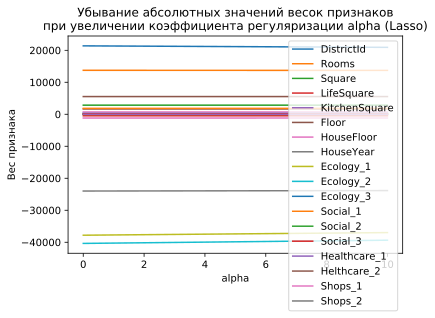

In [150]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha = val)
    lasso.fit(X_train.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весок признаков\nпри увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

In [151]:
X_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.0000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,50.328000,1.889875,56.046964,36.975780,6.376250,8.53350,12.5805,4.491441e+03,0.119457,0.009250,0.028500,24.591375,5332.631500,8.084375,1032.704625,1.307250,4.227375,0.080500
std,43.583154,0.848432,18.538662,15.615021,31.839043,5.26064,6.7133,2.241661e+05,0.119310,0.095737,0.166407,17.524948,4002.079925,23.889707,756.360900,1.482185,4.795524,0.272083
min,0.000000,0.000000,14.609163,8.822988,0.000000,1.00000,0.0000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,41.706521,24.434856,1.000000,4.00000,9.0000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,882.500000,0.000000,1.000000,0.000000
50%,35.000000,2.000000,52.536824,33.658346,6.000000,7.00000,12.0000,1.977000e+03,0.075779,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000
75%,75.000000,2.000000,65.853722,45.112286,9.000000,12.00000,17.0000,2.001000e+03,0.195781,0.000000,0.000000,35.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,0.000000
max,208.000000,19.000000,212.932361,142.651454,2014.000000,42.00000,99.0000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000
